In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("loan - loan.csv")

In [3]:
df.shape

(614, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
Loan_ID               0
CoapplicantIncome     0
ApplicantIncome       0
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [11]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [12]:
df_before = df.copy()

In [13]:
for col in categorical_cols:df[col].fillna(df[col].mode()[0], inplace=True)

for col in numeric_cols:df[col].fillna(df[col].mean(), inplace=True)

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
#Encoding
!pip install category_encoders

In [16]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=categorical_cols)
df=encoder.fit_transform(df)

In [17]:
df.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [18]:
# Split the data into features (X) and target (y)
df.columns = df.columns.str.strip() 
x = df.drop(['Loan_Status','Loan_ID'], axis=1) 
y = df['Loan_Status']

In [19]:
df["Loan_Status"].value_counts()

Loan_Status
1    422
2    192
Name: count, dtype: int64

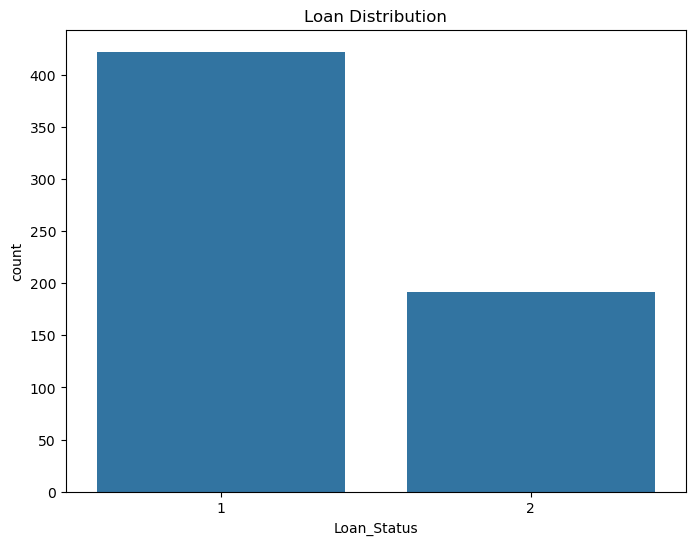

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Distribution')
plt.show()

In [21]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,1,1,5849,0.0,146.412162,360.0,1.0,1
1,1,2,2,1,1,4583,1508.0,128.000000,360.0,1.0,2
2,1,2,1,1,2,3000,0.0,66.000000,360.0,1.0,1
3,1,2,1,2,1,2583,2358.0,120.000000,360.0,1.0,1
4,1,1,1,1,1,6000,0.0,141.000000,360.0,1.0,1


In [22]:
# scaling the input feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.279851,0.45164,-1.250298
1,-0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.279851,0.45164,-0.060092
2,-0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.279851,0.45164,-1.250298
3,-0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.279851,0.45164,-1.250298
4,-0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.279851,0.45164,-1.250298


In [23]:
y.head()

0    1
1    2
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [ ]:
# divide into train dataset and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
x_train.shape,y_train.shape

((491, 11), (491,))

In [26]:
x_test.shape,y_test.shape

((123, 11), (123,))

In [27]:
# apply ml algorithm into training data
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train,y_train)


SVC()

In [28]:
#model prediction 
lr_pred = lr_model.predict(x_test)
dt_pred = dt_model.predict(x_test)
knn_pred=knn_model.predict(x_test)
rf_pred=rf_model.predict(x_test)
svm_pred=svm_model.predict(x_test)
lr_pred
dt_pred
knn_pred
rf_pred
svm_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
lr_pred[:5]
dt_pred[:5]
knn_pred[:5]
rf_pred[:5]
svm_pred[:5]


array([1, 1, 1, 1, 1])

In [30]:
y_test[:5]

454    1
52     2
536    1
469    2
55     1
Name: Loan_Status, dtype: int64

In [31]:
#model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lr_accuracy = accuracy_score(y_test, lr_model.predict(x_test)) * 100
dt_accuracy = accuracy_score(y_test,dt_model.predict(x_test)) *100
knn_accuracy = accuracy_score(y_test,knn_model.predict(x_test)) *100
rf_accuracy = accuracy_score(y_test,rf_model.predict(x_test)) *100
svm_accuracy = accuracy_score(y_test,svm_model.predict(x_test)) *100

print(f"LR Accuracy: {lr_accuracy:.2f}%")
print(f"DT Accuracy: {dt_accuracy:.2f}%")
print(f"KNN Accuracy: {knn_accuracy:.2f}%")
print(f"RF Accuracy: {rf_accuracy:.2f}%")
print(f"SVM Accuracy: {svm_accuracy:.2f}%")

LR Accuracy: 84.55%
DT Accuracy: 72.36%
KNN Accuracy: 65.04%
RF Accuracy: 79.67%
SVM Accuracy: 73.17%


In [32]:
print("\nClassification Report:\n", classification_report(y_test, lr_pred))
print("\nClassification Report:\n", classification_report(y_test, dt_pred))
print("\nClassification Report:\n", classification_report(y_test, knn_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.99      0.90        90
           2       0.94      0.45      0.61        33

    accuracy                           0.85       123
   macro avg       0.88      0.72      0.76       123
weighted avg       0.86      0.85      0.83       123


Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.77      0.80        90
           2       0.49      0.61      0.54        33

    accuracy                           0.72       123
   macro avg       0.66      0.69      0.67       123
weighted avg       0.75      0.72      0.73       123


Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.81      0.77        90
           2       0.29      0.21      0.25        33

    accuracy                           0.65       123
   macro avg       0.51      0.51      0.51       123

In [33]:
# Confusion matrix
conf_matrix1 = confusion_matrix(y_test,lr_pred)
conf_matrix2 = confusion_matrix(y_test,dt_pred)
conf_matrix3 = confusion_matrix(y_test,knn_pred)
conf_matrix4=confusion_matrix(y_test,rf_pred)
conf_matrix5=confusion_matrix(y_test,svm_pred)

conf_matrix1
conf_matrix2
conf_matrix3
conf_matrix4
conf_matrix5

array([[90,  0],
       [33,  0]])

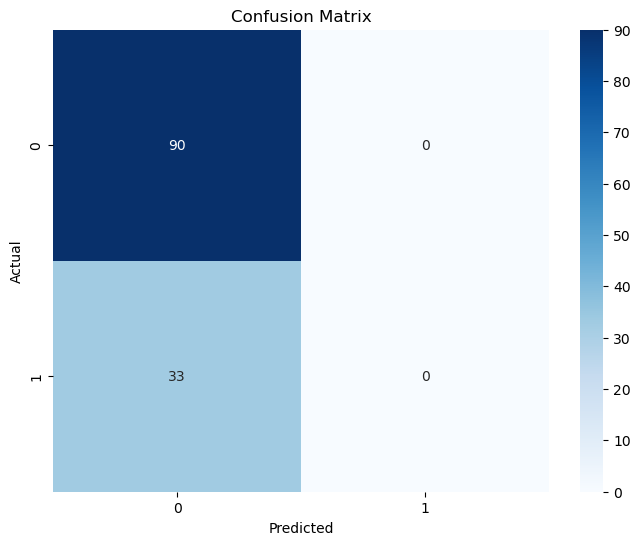

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
# using grid search CV for logistic regression
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(max_iter=1000)

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [36]:
# Fit on training data
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             scoring='accuracy', verbose=2)

In [37]:
# Best Parameters and Score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 100, 'penalty': 'l2'}
Best Cross-Validation Accuracy: 0.806472892187178


In [38]:
lr=LogisticRegression(C=1, penalty='l2')
lr.fit(x_train,y_train)

LogisticRegression(C=1)

In [39]:
y_pred=lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred) * 100
print(f"LR Accuracy: {accuracy:.2f}%")

LR Accuracy: 84.55%


In [40]:
# using grid search cv for decision tree
from sklearn.model_selection import GridSearchCV

# Define the model
dt = DecisionTreeClassifier(random_state=42)

# Define parameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9, 12, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search= GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [41]:
# Fit Grid Search
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 9, 12, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [42]:
# Best Parameters and Score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Best Cross-Validation Accuracy: 0.806472892187178


In [43]:
DT=DecisionTreeClassifier(criterion='gini',max_depth=3,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,splitter='random')
DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_split=5,
                       splitter='random')

In [44]:
y_pred=DT.predict(x_test)
accuracy = accuracy_score(y_test,y_pred) * 100
print(f"DT Accuracy: {accuracy:.2f}%")

DT Accuracy: 72.36%


In [45]:
#using grid search cv for KNN
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
# Define parameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21],  
    'weights': ['uniform', 'distance'],       
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

# Initialize GridSearchCV
grid_search= GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [46]:
# Fit Grid Search
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15, 21], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [47]:
# Best Parameters and Score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.6802308802308802


In [48]:
knn=KNeighborsClassifier(metric='euclidean',n_neighbors=11,p=1,weights='uniform')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11, p=1)

In [49]:
y_pred=knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred) * 100
print(f"knn Accuracy: {accuracy:.2f}%")

knn Accuracy: 68.29%


In [50]:
#using grid search cv for RANDOM FOREST
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search= GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [51]:
# Fit Grid Search
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [52]:
# Best Parameters and Score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.7861265718408575


In [53]:
RF=RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

In [54]:
y_pred=RF.predict(x_test)
accuracy = accuracy_score(y_test,y_pred) * 100
print(f"RF Accuracy: {accuracy:.2f}%")

RF Accuracy: 76.42%


In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Initialize the model
svm = SVC(probability=True, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear','rbf'],
    'gamma': ['scale']
    
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)


In [56]:
# Fit Grid Search
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [57]:
# Best Parameters and Score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.7921871779014636


In [60]:
svm = SVC(C=0.1,gamma='scale',kernel='linear')
svm.fit(x_train,y_train)

SVC(C=0.1, kernel='linear')

In [61]:
y_pred=svm.predict(x_test)
accuracy = accuracy_score(y_test,y_pred) * 100
print(f"SVM Accuracy: {accuracy:.2f}%")

SVM Accuracy: 83.74%
